# Motions of particles subject to forces
It is often necessary to model the trajectory of some object that that is being acted on by a number of forces. This exercise will also give you examples of plotting functions and graphs.  As always, if you don't understand what a particular command in doing, just post a question on Piazza.  Also, your friend [Google](https://google.com) is very helpful!
 
## Under gravitational force
 As simple example is a ball falling under the force of gravity, from some height $h$.  In this case we have the intial conditions:

* $y(t=0) = h$
* $v(t=0) = 0$ (assuming it's falling from rest)

And (ignoring air resistance the driving force is):
* $F=mg$ (Force constant in freefall)
* $a=g=F/m$ (acceleration constant in freefall)

We can solve for the motion in a number of ways.  For example, many physics students will begin by using energy conservation (initial potential energy = final kinetic energy): $E_i = mgh = E_f = 0.5mv_f^2 \to v_f = \sqrt{2gh}$<br>
and that for constant acceleration from rest $v_f=gt$, yielding $t=\sqrt{2h/g}$ for contact with the ground.  We'll look at a brute force solution to problems like this below, requiring only very simple calculations.

## Intro to plotting functions in ROOT: TF1

In the next cell we'll plot equations of motion usind the closed form solutions.  This also illustrates the use of a simple class to plot functions, [TF1](https://root.cern.ch/doc/master/classTF1.html)

In its most basic form we can create a 1D function as follows:
```myfunc = R.TF1("name","expression",xmin,xmax)```<br>
Then we can draw the function using ```myfunc.Draw()```

In [17]:
import ROOT as R
from math import sqrt

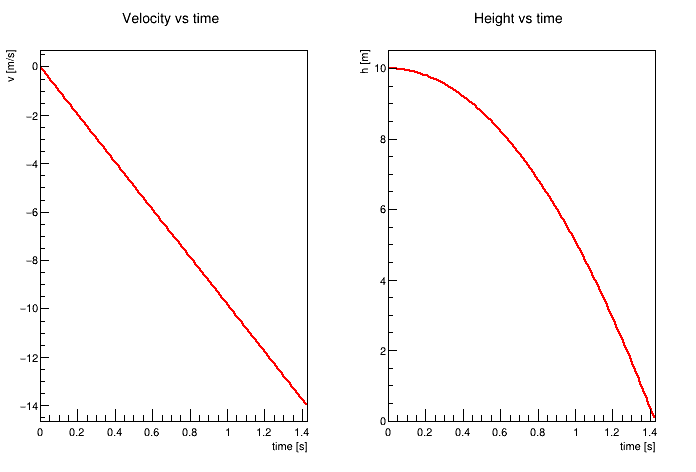

In [18]:
# some initial parameters
h0=10 # meters
m=1  # kg
g=9.81 # m/s^2
tf=sqrt(2*h0/g)

tc=R.TCanvas()
tc.Divide(2,1)  # here we split the canvas into 2x1 panels in x,y
fn_v = R.TF1("fn_v","-9.81*x",0,tf)
fn_v.SetTitle("Velocity vs time;time [s]; v [m/s]")
fn_h = R.TF1("fn_h","10-0.5*9.81*x*x",0,tf) 
fn_h.SetTitle("Height vs time;time [s]; h [m]")
tc.cd(1)        # acticate the first panel for plotting
fn_v.Draw()
tc.cd(2)        # activate the second panel for plotting
fn_h.Draw()
tc.Draw()

It's unsatisfying that the parameters above are hard coded in the functions.  If we change the $h0$ or $g$, we'll have to edit the functions.  A better choice is to make these values parameters in the functions as in the following example, also see:
* https://root.cern.ch/doc/master/classTF1.html#F2


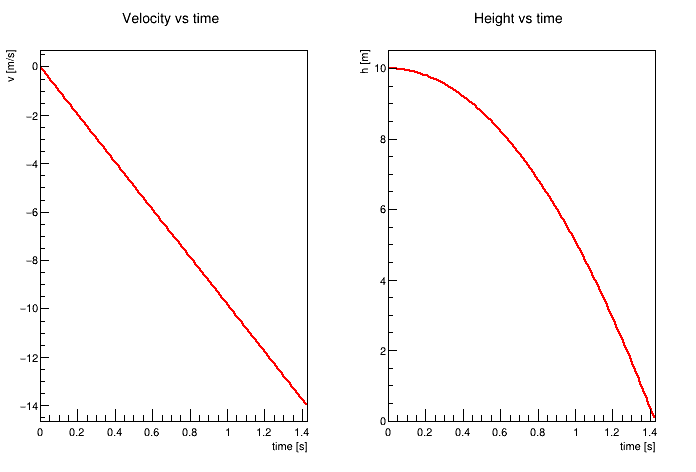

In [19]:
fn_v = R.TF1("fn_v","-[0]*x",0,tf)
fn_v.SetParameter(0,g)
fn_v.SetTitle("Velocity vs time;time [s]; v [m/s]")
fn_h = R.TF1("fn_h","[1]-0.5*[0]*x*x",0,tf) 
fn_h.SetParameters(g,h0)       # parameter0 is g, parameter 1 is h0
fn_h.SetTitle("Height vs time;time [s]; h [m]")
tc.cd(1)        # acticate the first panel for plotting
fn_v.Draw()
tc.cd(2)        # activate the second panel for plotting
fn_h.Draw()
tc.Draw()

## Intro to plotting functions: matplotlib
Here is a similar example using matplotlib.  Notice that here we have to evalute the function at a set of $x$ values to get a set of $f(x)$ values.  So this is very similar to the [TGraph](https://root.cern.ch/doc/master/classTGraph.html) from our previous example.

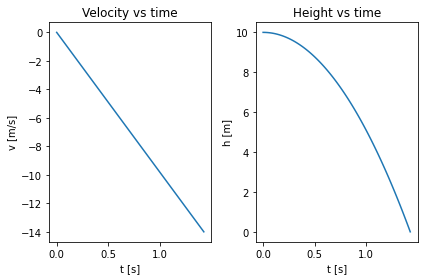

In [20]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0.0, tf, 100)  # create a 100 element array from 0 to tf

v = -g*t              # notice that the command is 'vectorized' by numppy
h = h0-0.5*g*t*t     # there is no need to loop over the individual values yourself!

plt.subplot(1, 2, 1)
plt.plot(t, v)
plt.title('Velocity vs time')
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')


plt.subplot(1, 2, 2)
plt.plot(t, h)
plt.title('Height vs time')
plt.xlabel('t [s]')
plt.ylabel('h [m]')

plt.tight_layout()   #cleans up the layout to prevent overlapping of labels and plots
plt.show()


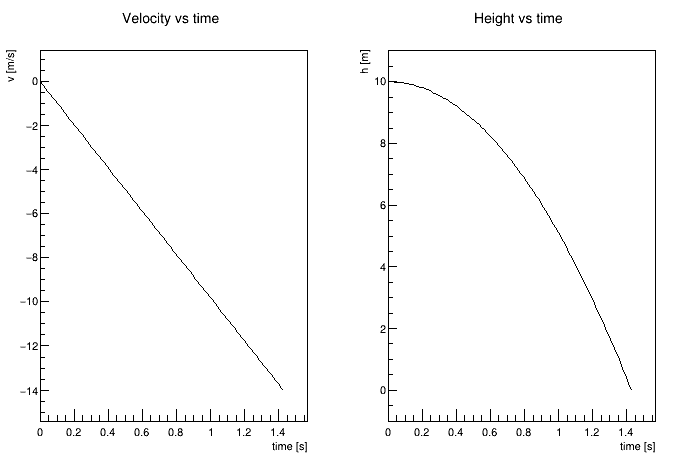

In [21]:
# Or let's use the numpy vectors in TGraphs!
tg_v=R.TGraph(len(t),t,v)
tg_v.SetTitle("Velocity vs time;time [s]; v [m/s]")
tg_h=R.TGraph(len(t),t,h)
tg_h.SetTitle("Height vs time;time [s]; h [m]")
tc.cd(1)
tg_v.Draw("al")   # draw the axes, and connect the points with line segments
tc.cd(2)
tg_h.Draw("al")
tc.Draw()

## Calculating the motion from initial conditions and forces

In almost any realistic problem, we are immediately faced with complications that preclude using simple algebra to solve for the motion of the system.  In fact writing down a close form solution is rarely, if ever, possible!  For example, add some air resistance and the problem becomes substantialy more complicated.  It's better is we start from Newton's 2nd Law: $F=ma$ or equivalently $a=m/F$.  

Technically, we need to solve (numerically) something called a 2nd order differential equation.  But we can avoid the details of the calculus by breaking down the motion into small time steps.  Rather than try to write down the entire equation of motion, we'll just imagine that some small time $dt$ ellapses after $t=0$ and estimate how that object/pariticle has moved in that tiny bit of time time.

### Using Euler's method to solve for a falling body

Initial conditions:
* $y_0 = y(t=0) = h$
* $v_0 = v(t=0) = 0$ (assuming it's falling from rest)

Force:
* $F=mg$ (Force constant in freefall)

Now we can immediately track the particle in a small time increment:

* $y_1 = y_0 + v_0dt$
* $v_1 = v_0 + a dt = v_0 + \frac{F}{m} dt$

**How can this be (even approximately) valid?** We know the velocity is constantly changing due to the acceleration, but the 1st equation above assumes the velocity is constant during the time step.  In fact the correct equation for position (if acceleration is constant) is: $y=y_0+v_0dt+0.5a(dt)^2$. But the approximation is not bad for *small* time intervals where $(dt)^2\lt\lt dt$.  Any function will be approximately linear in this limit.  Imagine zooming in to a very small region on some curve.  The curve will look more and more flat as the interval gets smaller. [![https://mathoverflow.net/q/77227](img/zoom.gif)](https://mathoverflow.net/q/77227)

How small is small enough?  This is compoutational work, so it's up to you to figure that out!  Every problem is different, but you an change $dt$ and see when it get small enough that the answer doesn't depend strongly on it's value.

Let's apply the method below.

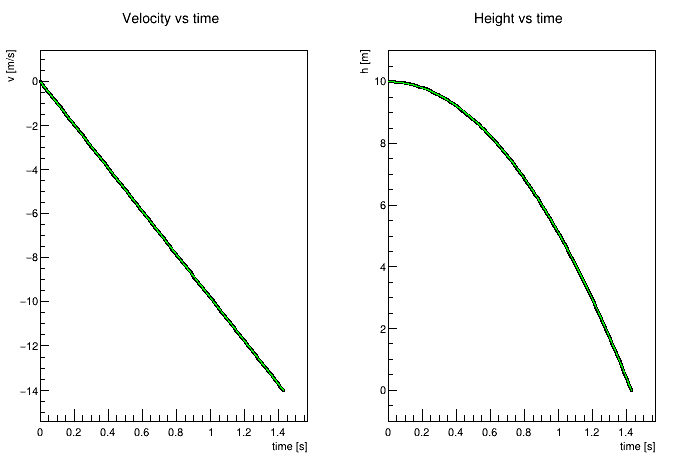

In [22]:
# Initial conditions
y0=10   # meters
v0=0

# acceleration, now being more careful about signs
a = -9.81 # m/s^2 in -y direction
t = 0
dt = 0.001 # 1 millisecond time step

tg_vEu = R.TGraph()
tg_hEu = R.TGraph()

tg_vEu.SetTitle("Velocity vs time;time [s]; v [m/s]")
tg_hEu.SetTitle("Height vs time;time [s]; h [m]")

# we'll use a loop here to track the particle step-by-step
# then stop when we hit the ground
y=y0
v=v0
t=0
while y>0:
    y=y+v*dt
    v=v+a*dt
    t=t+dt
    tg_vEu.SetPoint(tg_vEu.GetN(),t,v)
    tg_hEu.SetPoint(tg_hEu.GetN(),t,y)

tc.cd(1)
tg_v.SetLineWidth(3)
tg_v.Draw("al")   # draw the axes, and connect the points with line segments
tg_vEu.SetLineColor(R.kGreen)
tg_vEu.Draw("l")
tc.cd(2)
tg_h.SetLineWidth(3)
tg_h.Draw("al")
tg_hEu.SetLineColor(R.kGreen)
tg_hEu.Draw("l")
tc.Draw()

**Notice how well the approximation (green lines) agrees with the exact calculation (black lines)!**

Euler's Method is the most basic method that can be used to solve for trajectories.  It is the easiest method to understand and code.  However it is generally computationally inefficient for reaching a given level of accuracy compred to *higher order* methods.  However, we'll use this method (at least for now), to keep a very clear picture of what we're doing.  Conceptually, it does everything we need.

### Application to projectile motion

This general method can be applied to much more complicated situations.  Here's an example: we'll solve for [projectile motion](https://en.wikipedia.org/wiki/Projectile_motion) in 2 dimensions and even add air resistance to the problem. ![projectile motion](https://upload.wikimedia.org/wikipedia/commons/7/75/Projectile_motion.png)

The method is described in the code cell below, follows the same steps as above:
* start with initial conditions (position and velocity)
* define the change in position with time: $x_{i+1} = x_i + v_{x,i}dt$
* define the change in velocity with time: $v_{x,i+1} = v_{x,i} + a_{x,i}dt$, where $a=F_x/m$
* repeat for each independent direction of motion, eg $(x,y,z)$

Note that copysign function is used to set the direction of the force from air resistance opposite to the direction of motion here are some examples of how the copy sign function operates.  The sign of the second number is just assigned to the first:
```
>>> copysign(1,3)
1.0
>>> -copysign(2,-7.1)
2.0
```


7.0710678118654755 7.071067811865475
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013


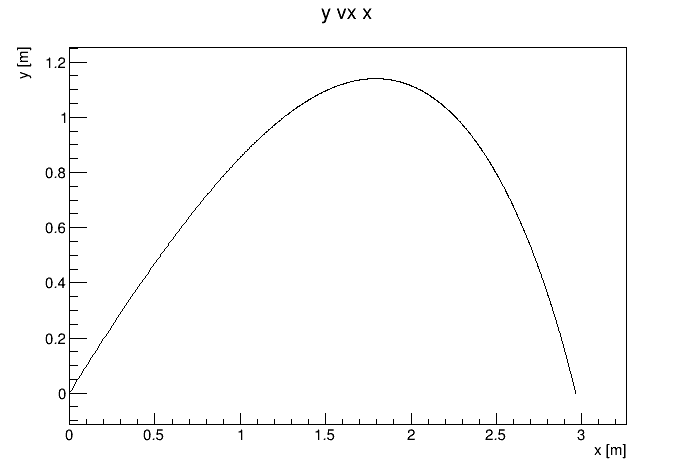

In [23]:
# the setup begins the same way as above, but we have to solve for motion
# in both the x and y directions
from math import sin,cos,sqrt,atan2,pi,copysign

# Initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

# gravitational acceleration, now being more careful about signs
gy = -9.81  # m/s^2 in -y direction
gx = 0
dt = 0.001  # 1 millisecond time step

# Force from air resistance, using the simple model F=k*v^2
# Real air resistance models are more detailed, but that doesn't
# matter for getting the gist of the method
def ForceAR(v,k=0.1):
    return k*v*v  # magnitude of air resistance force

tg_yx=R.TGraph()
tg_yx.SetTitle("y vx x;x [m];y [m]")

print(vx,vy)

# we'll use a loop here to track the particle step-by-step
# then stop when we hit the ground
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_yx.SetPoint(tg_yx.GetN(),x,y)
    n=tg_yx.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
    
tc=R.TCanvas()
tg_yx.Draw("alp")
tc.Draw()

### Exercise 1: plotting the trajectory
Make a set of plots on canvas showing the following components of the trajectory:
* y vs x
* x vs t
* y vs t
* vx vs t
* vy vs t
* |v| vs t
* Kinetic energy $\frac{1}{2}mv^2$ vs t
* any other plots you like

Make sure to properly label all of your plots (titles and axes)!

0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013
0.007071067811865475 0.0070710678118654745 7.0427835406180135 7.032973540618013


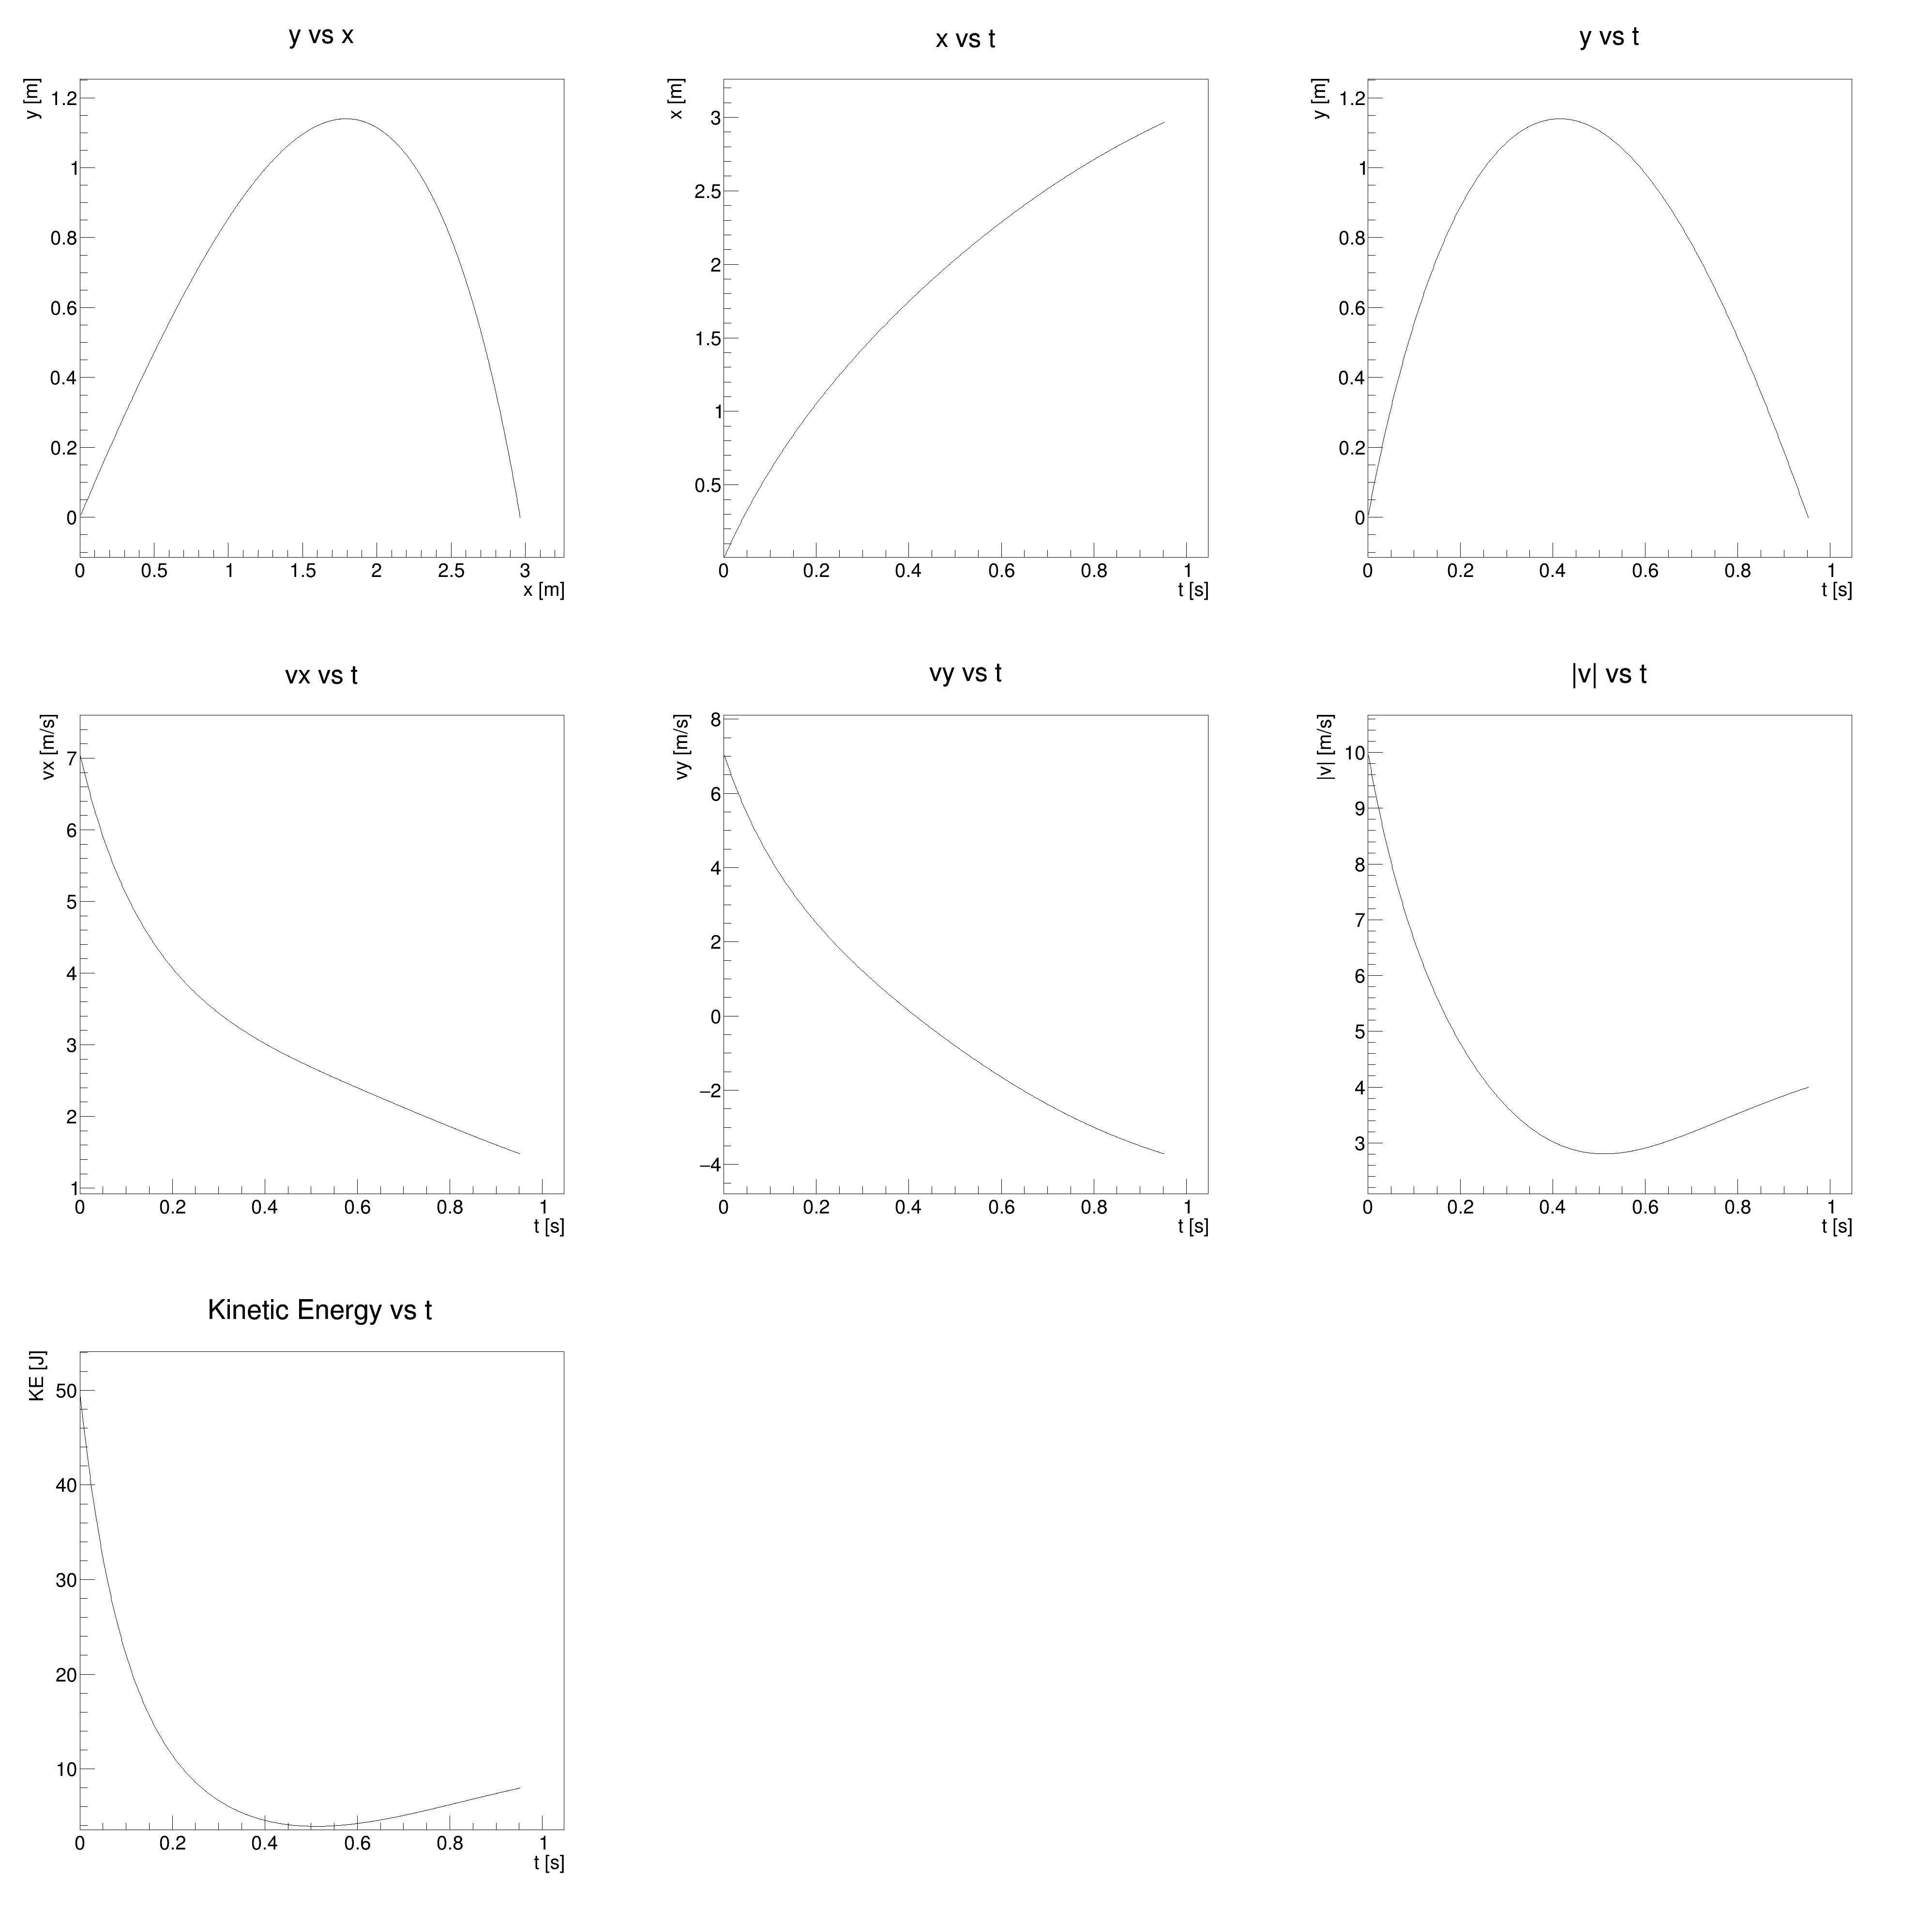

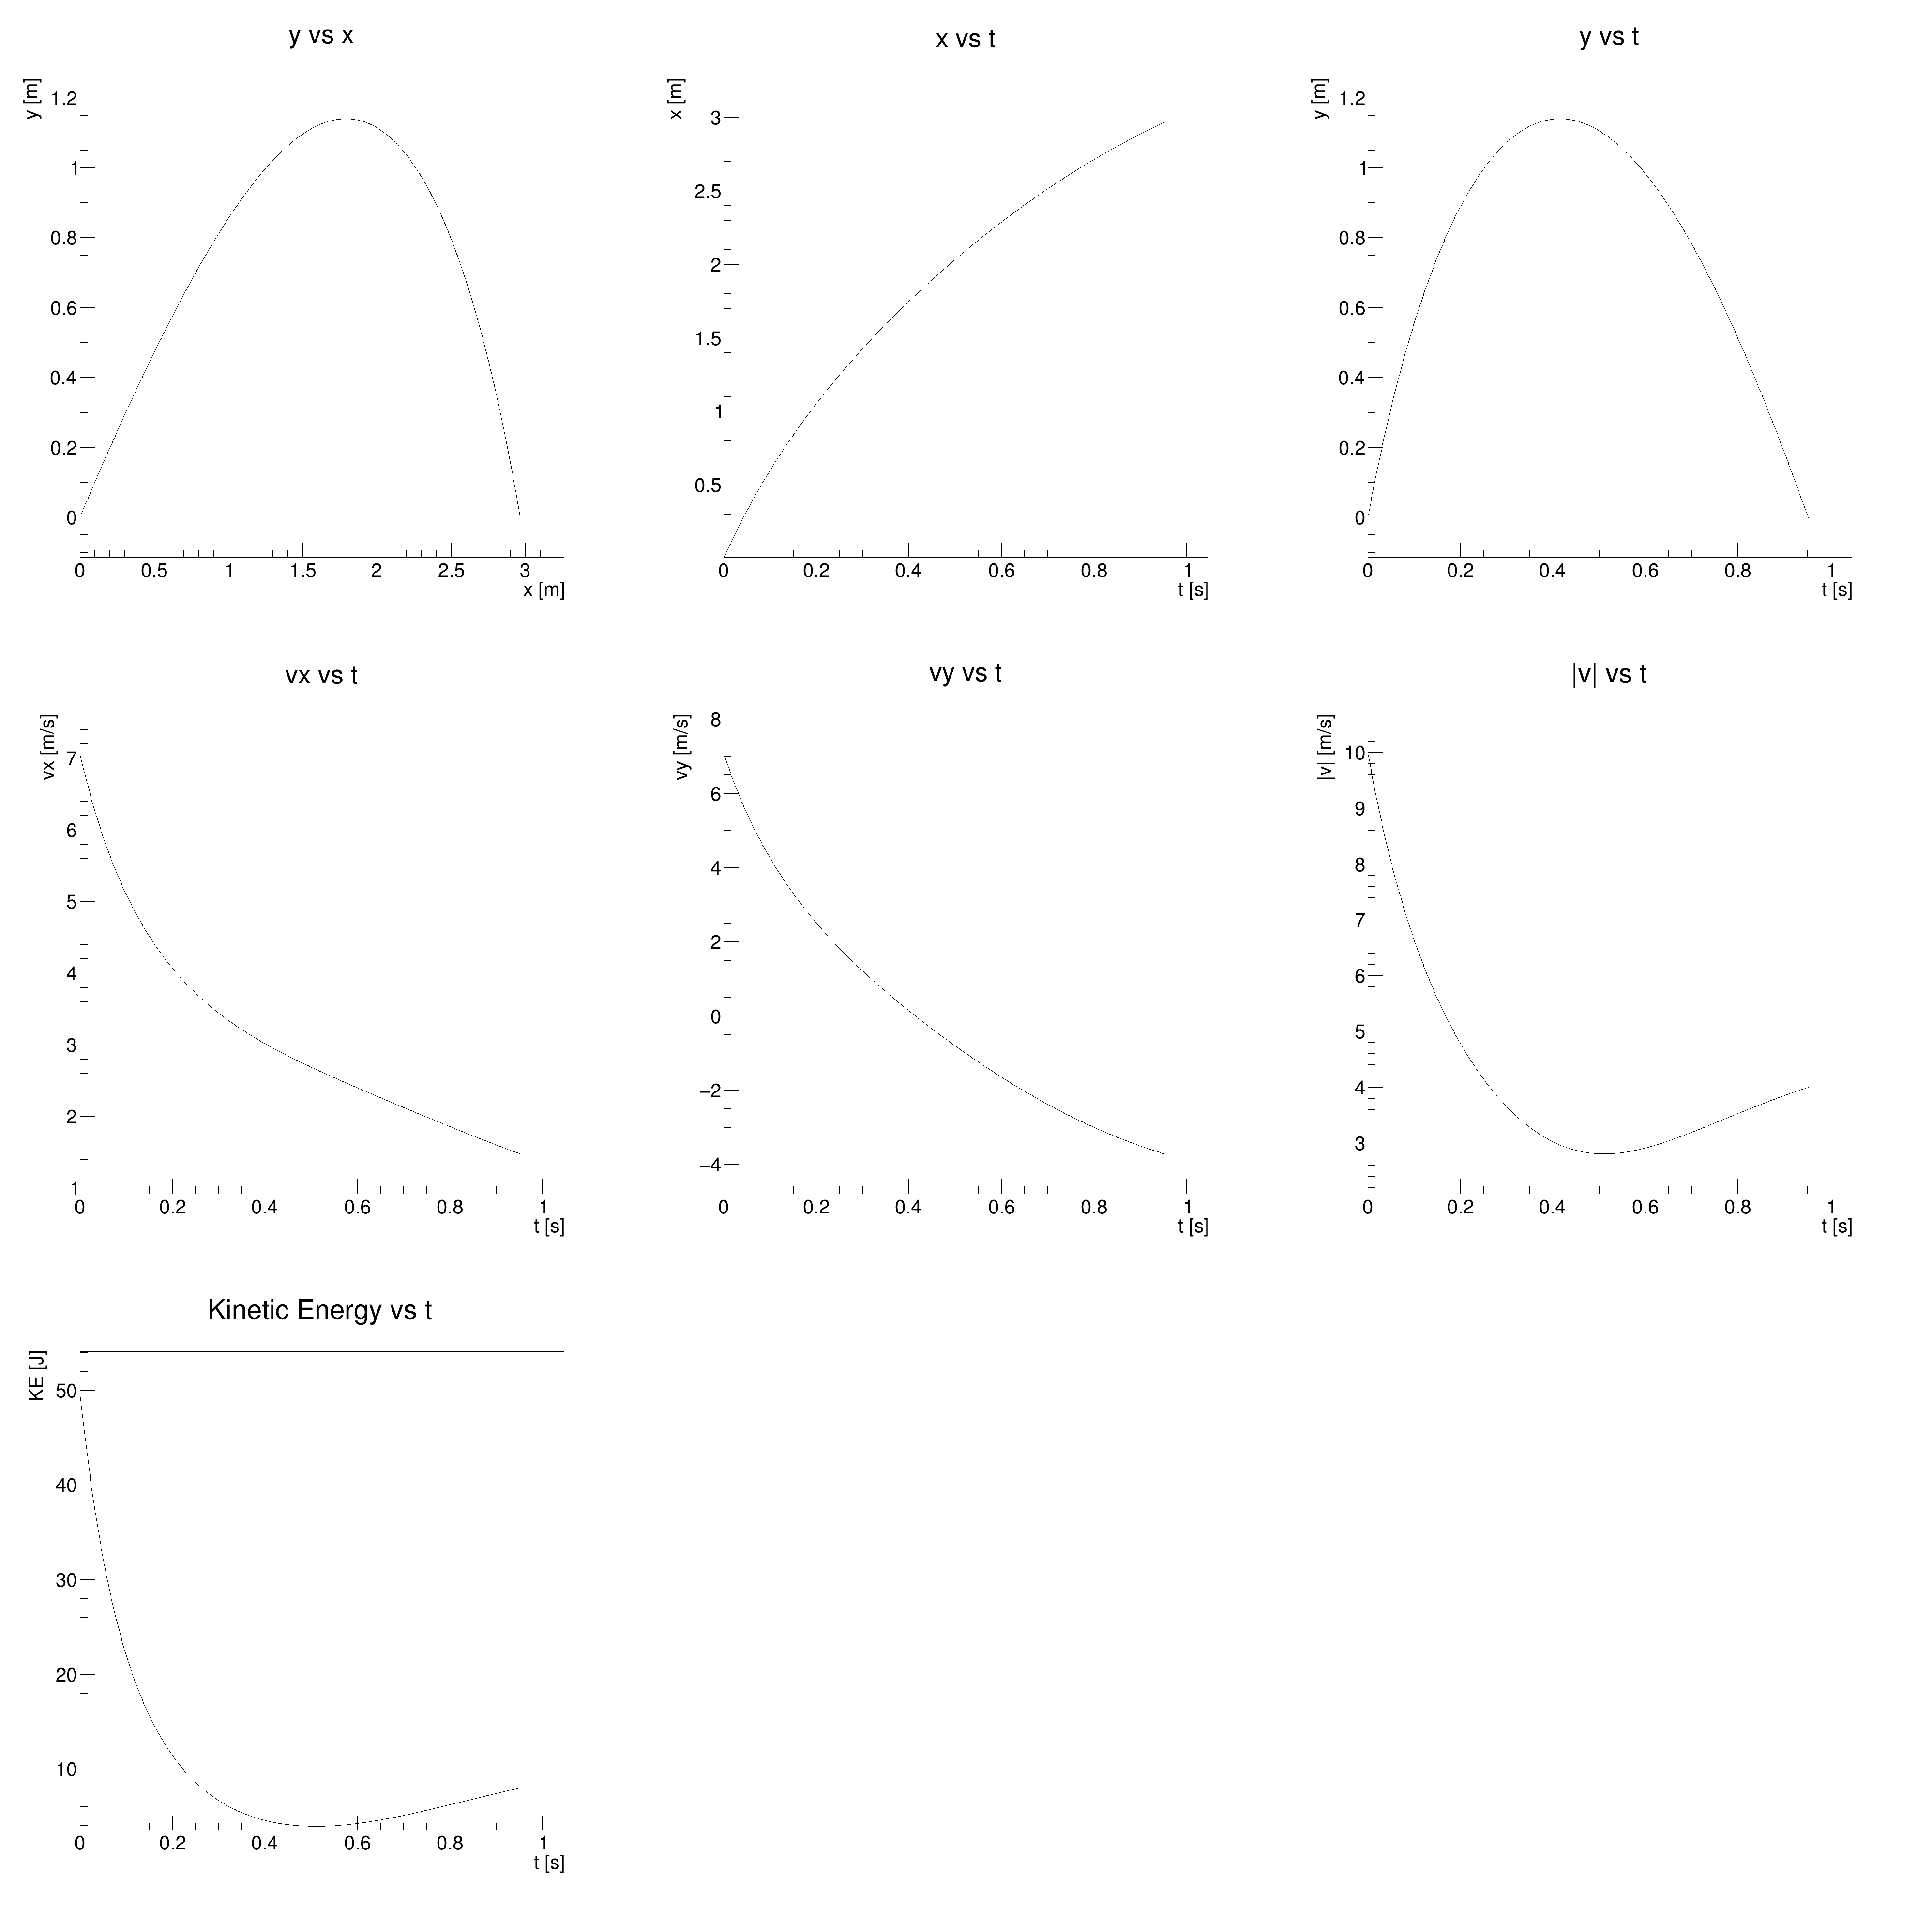

In [24]:
# the setup begins the same way as above, but we have to solve for motion
# in both the x and y directions
import ROOT as R
from math import sin,cos,sqrt,atan2,pi,copysign

# Initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

# gravitational acceleration, now being more careful about signs
gy = -9.81  # m/s^2 in -y direction
gx = 0
dt = 0.001  # 1 millisecond time step

# Force from air resistance, using the simple model F=k*v^2
# Real air resistance models are more detailed, but that doesn't
# matter for getting the gist of the method
def ForceAR(v,k=0.1):
    return k*v*v  # magnitude of air resistance force

tc=R.TCanvas("","",4000,4000) #creating the canvas
tc.Divide(3,3)  #split the canvas into 3x3 panels in x,y

''''''''''''
    #Y vs X
''''''''''''

# we'll use a loop here to track the particle step-by-step
# then stop when we hit the ground
tg_yx=R.TGraph()
tg_yx.SetTitle("y vs x;x [m];y [m]")

while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_yx.SetPoint(tg_yx.GetN(),x,y)
    n=tg_yx.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
    
tc.cd(1)
tg_yx.Draw("alp")

''''''''''''
    #x vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_xt=R.TGraph()
tg_xt.SetTitle("x vs t;t [s];x [m]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_xt.SetPoint(tg_xt.GetN(),t,x)
    n=tg_xt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(2)
tg_xt.Draw("alp")


''''''''''''
    #y vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_yt=R.TGraph()
tg_yt.SetTitle("y vs t;t [s];y [m]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_yt.SetPoint(tg_yt.GetN(),t,y)
    n=tg_yt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(3)
tg_yt.Draw("alp")

''''''''''''
    #vx vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_vxt=R.TGraph()
tg_vxt.SetTitle("vx vs t;t [s];vx [m/s]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_vxt.SetPoint(tg_vxt.GetN(),t,vx)
    n=tg_vxt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(4)
tg_vxt.Draw("alp")

''''''''''''
    #vy vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_vyt=R.TGraph()
tg_vyt.SetTitle("vy vs t;t [s];vy [m/s]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_vyt.SetPoint(tg_vyt.GetN(),t,vy)
    n=tg_vyt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(5)
tg_vyt.Draw("alp")


''''''''''''
    ## |V| vs T
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
vMag = v0
m=1.0    # kg

tg_vMag=R.TGraph()
tg_vMag.SetTitle("|v| vs t;t [s];|v| [m/s]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    vMag = abs(sqrt((vx**2)+(vy**2)))
    t=t+dt
    tg_vMag.SetPoint(tg_vMag.GetN(),t,vMag)
    n=tg_vMag.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(6)
tg_vMag.Draw("alp")


''''''''''''
    ##KE vs T
''''''''''''

# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
vMag = v0
KE = 0
m=1.0    # kg

tg_vKEt=R.TGraph()
tg_vKEt.SetTitle("Kinetic Energy vs t;t [s];KE [J]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt(vx*vx+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v            # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    vMag = abs(sqrt((vx**2)+(vy**2)))
    KE = .5 * (vMag**2)
    t=t+dt
    tg_vKEt.SetPoint(tg_vKEt.GetN(),t,KE)
    n=tg_vKEt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(7)
tg_vKEt.Draw("alp")
tc.Draw()

### Exercise 2:
Make a plot (or plots) of y vs x for different values of $k$ the coefficient of air resistance

In [25]:
# Calculation and plotting code goes here

### Exercise 3: Challange
Model a headwind of 5m/s.  Plot the trajectory for the conditions in Exercise 1 with and without the headwind.

0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579
0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579
0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579
0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579
0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579
0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579
0.007071067811865475 0.0070710678118654745 7.031499068835791 7.02168906883579


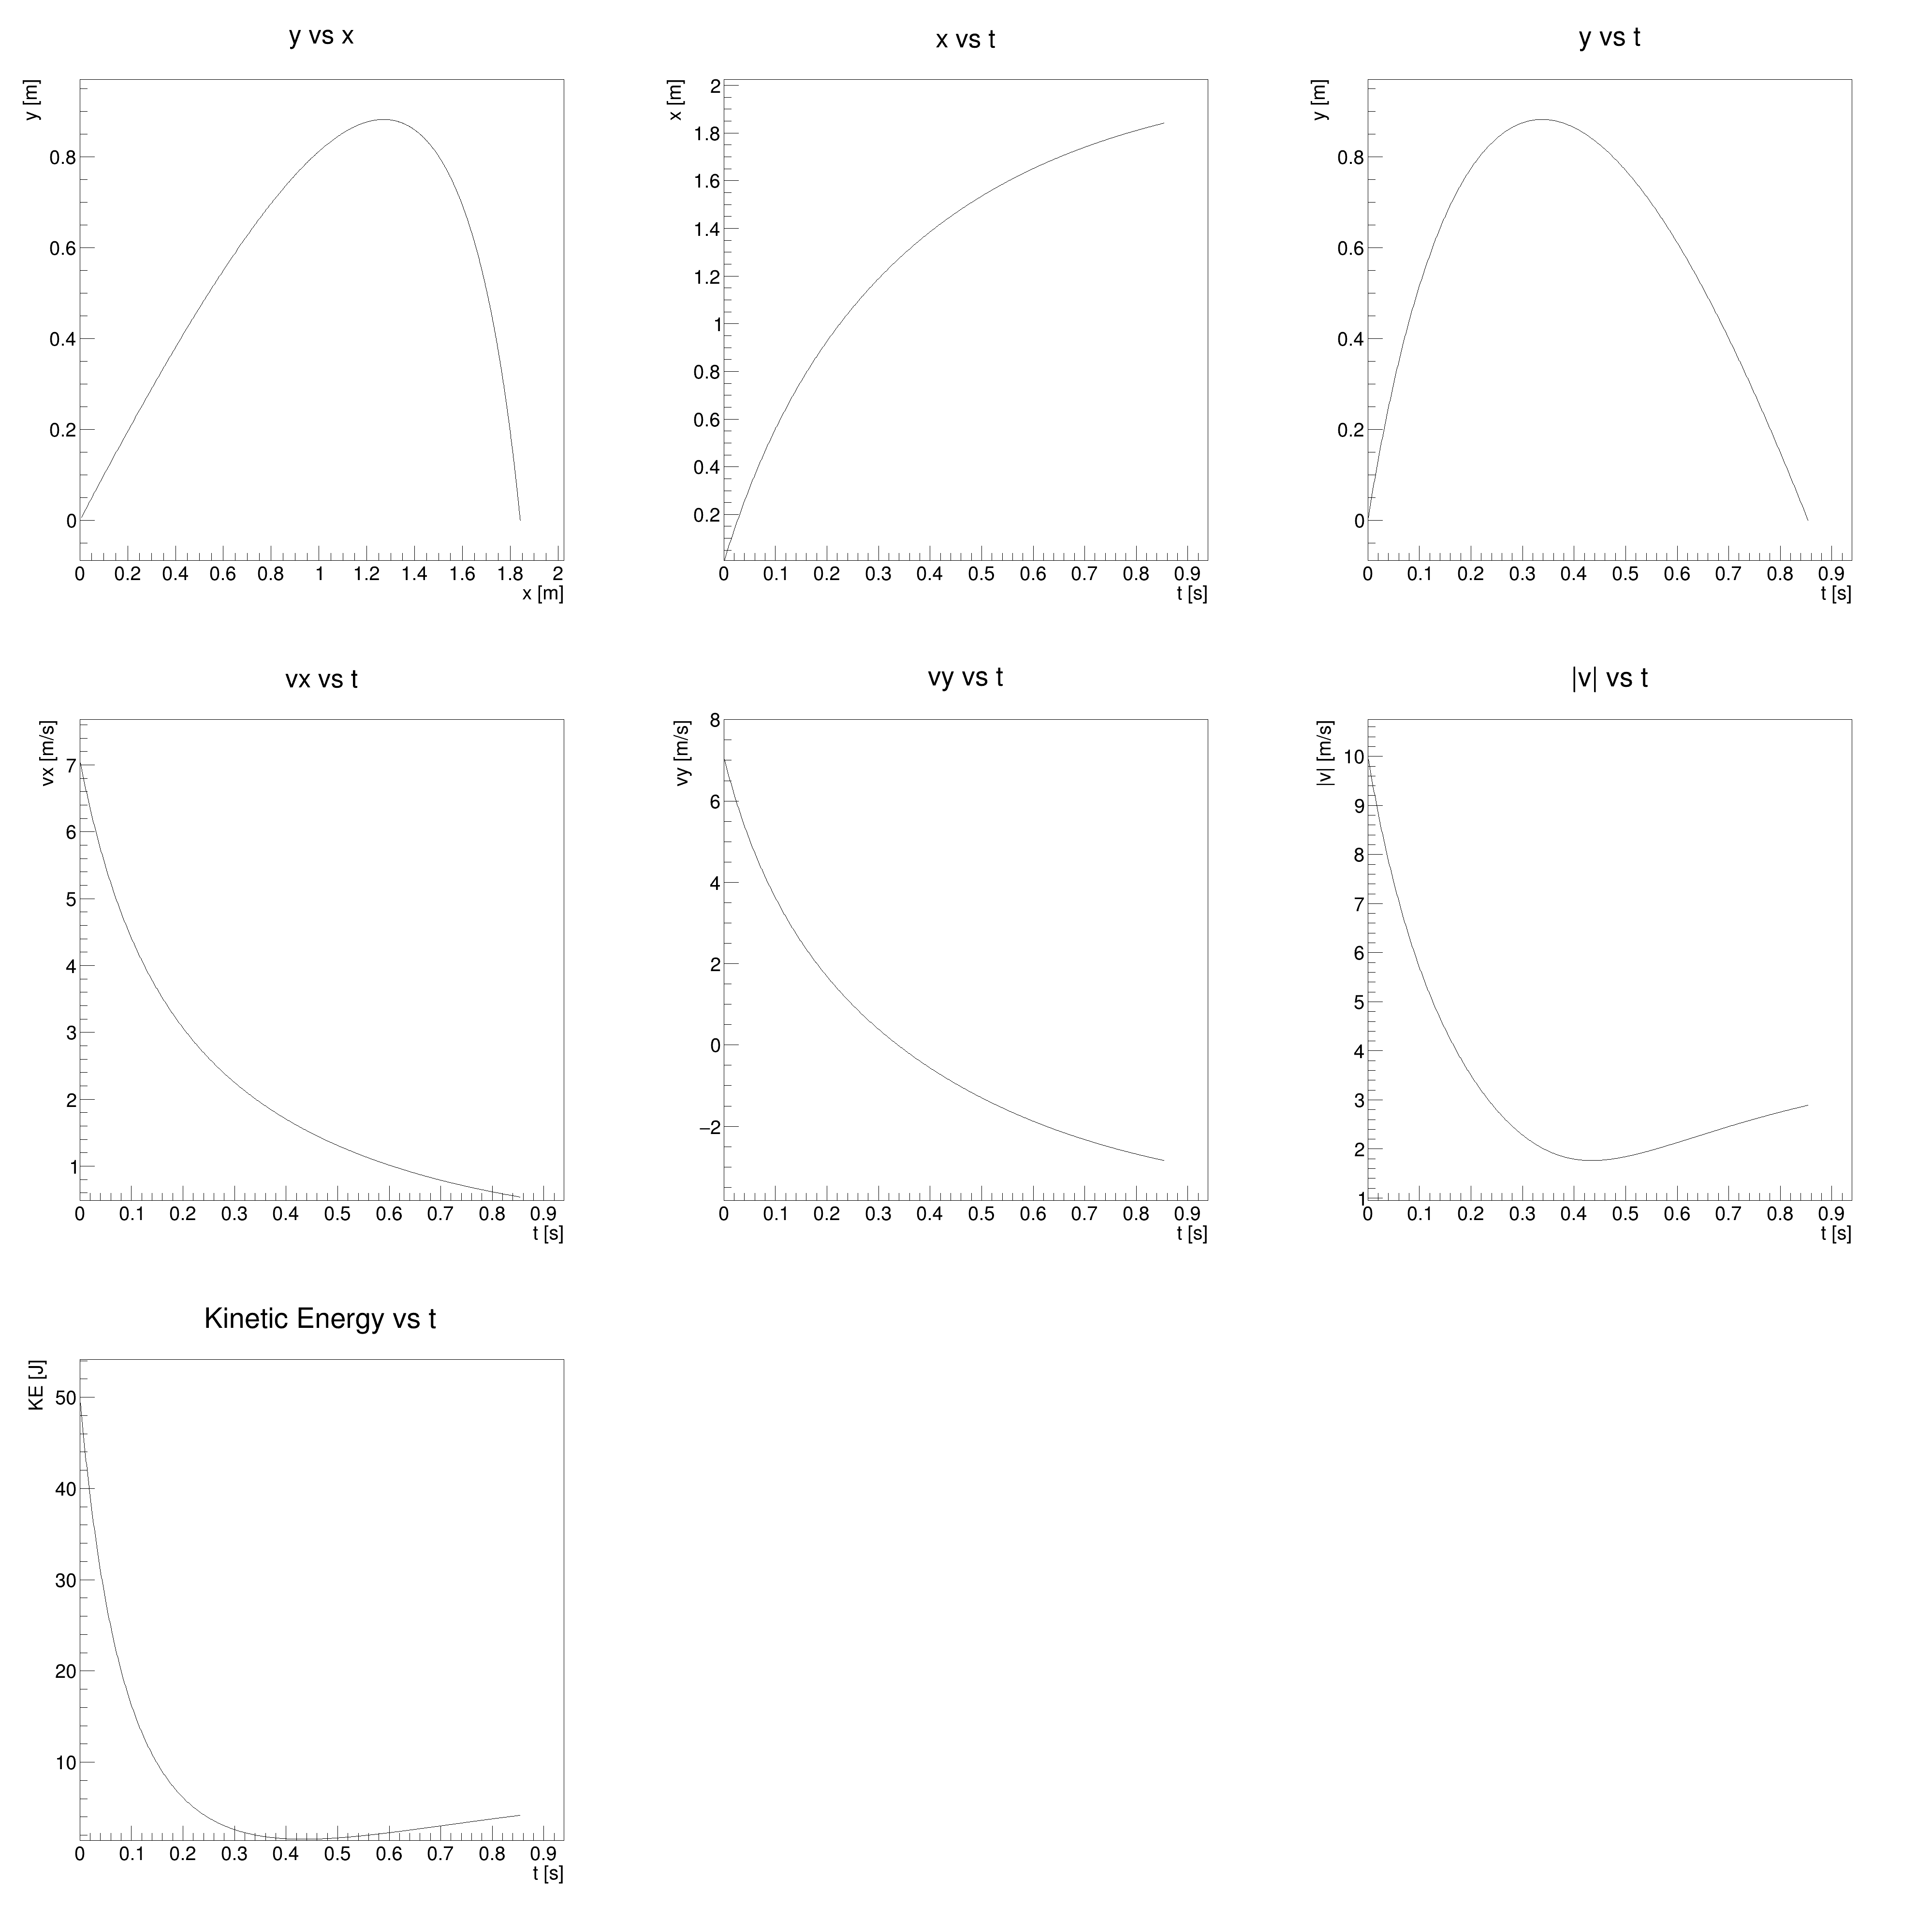

In [26]:
# Calculation and plotting code goes here
import ROOT as R
from math import sin,cos,sqrt,atan2,pi,copysign

# Initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

# gravitational acceleration, now being more careful about signs
gy = -9.81  # m/s^2 in -y direction
gx = 0
dt = 0.001  # 1 millisecond time step

# Force from air resistance, using the simple model F=k*v^2
# Real air resistance models are more detailed, but that doesn't
# matter for getting the gist of the method
def ForceAR(v,k=0.1):
    return k*v*v  # magnitude of air resistance force

def headwind(): 
    return .5*(5)**2 #force from a 5m/s headwind

tc=R.TCanvas("","",4000,4000) #creating the canvas
tc.Divide(3,3)  #split the canvas into 3x3 panels in x,y

''''''''''''
    #Y vs X
''''''''''''
# we'll use a loop here to track the particle step-by-step
# then stop when we hit the ground
tg_yx=R.TGraph()
tg_yx.SetTitle("y vs x;x [m];y [m]")

while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_yx.SetPoint(tg_yx.GetN(),x,y)
    n=tg_yx.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
    
tc.cd(1)
tg_yx.Draw("alp")


''''''''''''
    #x vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_xt=R.TGraph()
tg_xt.SetTitle("x vs t;t [s];x [m]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=Fv*vx/v # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_xt.SetPoint(tg_xt.GetN(),t,x)
    n=tg_xt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(2)
tg_xt.Draw("alp")


''''''''''''
    #y vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_yt=R.TGraph()
tg_yt.SetTitle("y vs t;t [s];y [m]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=(Fv*vx/v) # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_yt.SetPoint(tg_yt.GetN(),t,y)
    n=tg_yt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(3)
tg_yt.Draw("alp")

''''''''''''
    #vx vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_vxt=R.TGraph()
tg_vxt.SetTitle("vx vs t;t [s];vx [m/s]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=(Fv*vx/v) # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_vxt.SetPoint(tg_vxt.GetN(),t,vx)
    n=tg_vxt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(4)
tg_vxt.Draw("alp")


''''''''''''
    #vy vs t
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
m=1.0    # kg

tg_vyt=R.TGraph()
tg_vyt.SetTitle("vy vs t;t [s];vy [m/s]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=(Fv*vx/v) # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    t=t+dt
    tg_vyt.SetPoint(tg_vyt.GetN(),t,vy)
    n=tg_vyt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(5)
tg_vyt.Draw("alp")


''''''''''''
    ## |V| vs t
''''''''''''

# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
vMag = v0
m=1.0    # kg

tg_vMag=R.TGraph()
tg_vMag.SetTitle("|v| vs t;t [s];|v| [m/s]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)  # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=(Fv*vx/v) # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    vMag = abs(sqrt((vx**2)+(vy**2)))
    t=t+dt
    tg_vMag.SetPoint(tg_vMag.GetN(),t,vMag)
    n=tg_vMag.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(6)
tg_vMag.Draw("alp")


''''''''''''
    ##KE vs T
''''''''''''
# Reset initial conditions
x=0   # meters
y=0
t=0
v0=10            # initial velocity m/s
theta=45*pi/180  # launch angle.  All trig functions use radians!
vx=v0*cos(theta) 
vy=v0*sin(theta)
vMag = v0
KE = 0
m=1.0    # kg

tg_vKEt=R.TGraph()
tg_vKEt.SetTitle("Kinetic Energy vs t;t [s];KE [J]")
while y>=0:
    # distance change in x,y
    x=x+vx*dt
    y=y+vy*dt

    v=sqrt((vx+5)*(vx+5)+vy*vy)   # magnitude of velocity
    Fv=ForceAR(v,0.4)     # velocity-dependent air resistance force
    Fx=(Fv*vx/v)  # Fx = F*cos(theta), cos(theta) = vx/|v|
    Fy=Fv*vy/v            # Fy = F*sin(theta), cos(theta) = vy/|v|
    Fx=copysign(Fx,-vx)  # Force from air resistance is 
    Fy=copysign(Fy,-vy)  # always opposite to the motion!

    # velocity change in x,y: v_vew = v_old + F/m
    vx=vx+Fx/m*dt       # acceleration from air resistance
    vy=vy+(gy+Fy/m)*dt  # acceleration from gravity and air resistance
    vMag = abs(sqrt((vx**2)+(vy**2)))
    KE = .5 * (vMag**2)
    t=t+dt
    tg_vKEt.SetPoint(tg_vKEt.GetN(),t,KE)
    n=tg_vKEt.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tc.cd(7)
tg_vKEt.Draw("alp")
tc.Draw()

### Exercise 4: plotting the trajectory of a charged particle
Here is a much more realistic situation.  We have a set of positive charges, which are at fixed locations, and a negative charge that is free to drift.  For this exercise you will calculate the trajectory of the negative charge.

The force is calculated using Coulomb's law for the force between two point-like particles:
$F = -k \frac{q_1q_2}{r^2}$, $k$ = $8.99\times 10^9 N\,m^2/C^2$ <br> and $C$ is charge in Coulumbs.

Recall the the forces are **additive**, so the total force on the negative particle is just teh sum of the forces of all the other particles.

**Recommendations:**
1) for each step of the trajectory, the force on the particle will change with it's position.  This force is always calculaed from the sum of all other forces acting on the particle.  So it will be convenient to write a function that returns the $(x,y)$ components of the force as a function of the current position.  This will simplify the main loop in your code significantly.

2) Stop your simulation when the partile leaves the area shown.

3) As always, you will have to adjust your $dt$ to get a stable solution.  If $dt$ is too large, your trajectory may be very inacurate.  If you have at least a couple hundred points in your trajectory the result should be fine in this case.

Make a plot showing the initial charge distribution and the trajectory as a smooth curve.  To do this simply remake the plot below and, assuming you have a new TGraph called tg_traj, plot the trajectory using:<br>
``` tg_traj.Draw("c")```<br>
Notice that no axes are drawn ('a' option).  This will place the graph on top of the charge distribution with the trajectory drawn as a smooth curve.

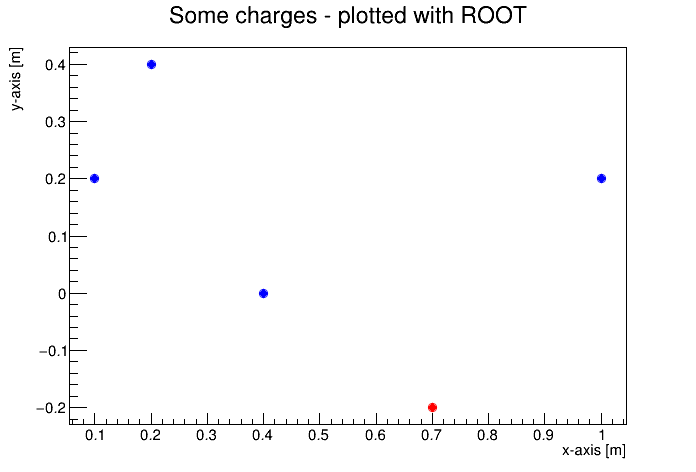

In [27]:
import ROOT as R
from ROOT import TVector3 as V3   # I'm going to be a little lazy about my typing!

canvas = R.TCanvas()
# here we make a list of location vectors and a list of the stationary charge values
Positions = [V3(.1,.2,0),V3(.2,.4,0),V3(1,.2,0),V3(.4,0,0)]  # in meters
Charges = [10,2,8,12]   # in microcoulombs
Charges = [x * 10**-6 for x in Charges] #convert microcoulombs to coulombs

# the moving charge
q = -4e-6
m = .1            # kg, mass of negatively charged particle
s = V3(.7,-.2,0)  # initial position 

# Here we create two graphs, one for + and one for - charges
# The graphs are combined in a TMultiGraph https://root.cern.ch/doc/master/classTMultiGraph.html
tgplus=R.TGraph()
for i in range(len(Positions)):
    tgplus.SetPoint(tgplus.GetN(),Positions[i].X(),Positions[i].Y())

tgminus=R.TGraph()
tgminus.SetPoint(0,s.X(),s.Y())

tgplus.SetMarkerStyle(R.kFullCircle)
tgplus.SetMarkerColor(R.kBlue)
tgminus.SetMarkerStyle(R.kFullCircle)
tgminus.SetMarkerColor(R.kRed)

tm=R.TMultiGraph()
tm.SetTitle("Some charges - plotted with ROOT;x-axis [m];y-axis [m]")
tm.Add(tgplus)
tm.Add(tgminus)
tm.Draw('ap')
canvas.Draw()

0.7 -0.2 -0.0027215951571613215 0.0032351291201641965
0.5078169822936098 -0.01776284334280524 -6.539276101327289 4.2699670053941015


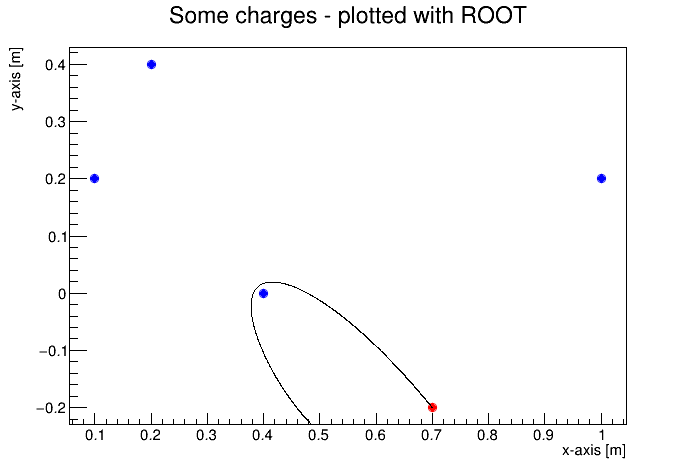

In [28]:
# Calculation and plotting code goes here
from math import sqrt

k_CONST = 8.9875518e9 #Couloumb Constant in Nm^2 / C^2

# Initial conditions
t=0
dt = 0.0001  #time step
# the moving charge
q = -4e-6
m = .1            # kg, mass of negatively charged particle
s = V3(.7,-.2,0)  # initial position 
x = 0.7
y = -0.2
vx = 0
vy = 0

def get_distance(x1,y1,x2,y2):
    return sqrt((x2-x1)**2 + (y2-y1)**2)

def electrostatic_force_vector(charge1, charge2, x1, y1, x2, y2):
    if x1 == x2 and y1 == y2:
        return R.TVector3(0,0,0) #return 0 if charge 1 and 2 have the same location
    else:
        unitVector = R.TVector3(x2-x1, y2-y1, 0).Unit()
        magnitude = -1*k_CONST*charge1*charge2/(get_distance(x1,y1,x2,y2)**2)
        return magnitude * unitVector #return resulting force vector

#canvas2 = canvas.Clone()
tg_traj = R.TGraph()
tg_traj.SetTitle("Trajectory of Charge Moving Through Electric Field; x-axis [m]; y-axis [m]")

while (x >= 0 and x <= 1.2) and (y >= -0.25 and y <= 0.45): #while the point is within the graph
    x = x + vx*dt #update x coordinate of particle
    y = y + vy*dt #update y coordinate of particle
    
    forceVector = R.TVector3(0,0,0)
    for point, charge in zip(Positions, Charges): #calculate the force on the charge for this iteration
        tempVector = electrostatic_force_vector(q, charge, x, y, point.X(), point.Y())
        forceVector += tempVector
        
    vx = vx + (forceVector.X()/m)*dt
    vy = vy + (forceVector.Y()/m)*dt
    
    t = t + dt
    tg_traj.SetPoint(tg_traj.GetN(),x,y)
    n=tg_traj.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
        

tg_traj.Draw('c')
canvas.Draw()

Now expand the area of the simulation and trace the trajectory for a longer period of time.  Explore the problem and see what you can observe.  

0.7 -0.2 -0.0002721595157161322 0.00032351291201641966
0.6986378102757234 -0.19838261167438367 -0.27326540391953014 0.32409128063070775


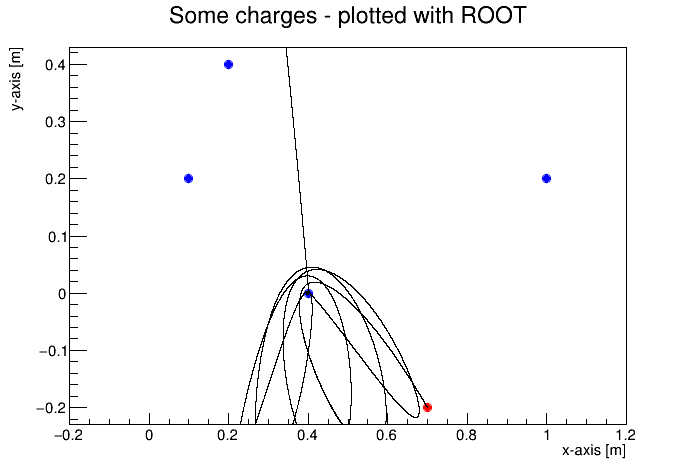

In [29]:
# Calculation and plotting code goes here
# Calculation and plotting code goes here
from math import sqrt

k_CONST = 8.9875518e9 #Couloumb Constant in Nm^2 / C^2

# Initial conditions
t=0
dt = 0.00001  #time step
# the moving charge
q = -4e-6
m = .1            # kg, mass of negatively charged particle
s = V3(.7,-.2,0)  # initial position 
x = 0.7
y = -0.2
vx = 0
vy = 0

def get_distance(x1,y1,x2,y2):
    return sqrt((x2-x1)**2 + (y2-y1)**2)

def electrostatic_force_vector(charge1, charge2, x1, y1, x2, y2):
    if x1 == x2 and y1 == y2:
        return R.TVector3(0,0,0) #return 0 if charge 1 and 2 have the same location
    else:
        unitVector = R.TVector3(x2-x1, y2-y1, 0).Unit()
        magnitude = -1*k_CONST*charge1*charge2/(get_distance(x1,y1,x2,y2)**2)
        return magnitude * unitVector #return resulting force vector

# canvas3 = canvas.Clone()
tg_traj2 = R.TGraph()
tg_traj2.SetTitle("Trajectory of Charge Moving Through Electric Field; x-axis [m]; y-axis [m]")

while (x >= -3 and x <= 3) and (y >= -3 and y <= 3): #while the point is within the graph
    x = x + vx*dt #update x coordinate of particle
    y = y + vy*dt #update y coordinate of particle
    
    forceVector = R.TVector3(0,0,0)
    for point, charge in zip(Positions, Charges): #calculate the force on the charge for this iteration
        tempVector = electrostatic_force_vector(q, charge, x, y, point.X(), point.Y())
        forceVector += tempVector
        
    vx = vx + (forceVector.X()/m)*dt
    vy = vy + (forceVector.Y()/m)*dt
    
    t = t + dt
    tg_traj2.SetPoint(tg_traj2.GetN(),x,y)
    n=tg_traj2.GetN()
    if n==1 or n==1000: print(x,y,vx,vy)
        
tm.GetYaxis().SetLimits(-2, 2)
tm.GetXaxis().SetLimits(-0.2,1.2)
tg_traj2.Draw('c') #TODO How to change dimensions of graph??????
#tm.Add(tg_traj)
#tm.Draw('ap')
canvas.Draw()